### Crop Recommendation System

In [18]:
# #import Libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

In [19]:
# # Load Dataset
# df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\crop-recommendation\data\crop_recommendation.csv')
# df.head()


In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Load original dataset (make sure it's in the same folder or give full path)
df = pd.read_csv(r'../data/crop_recommendation.csv')
print("Original shape:", df.shape)

# Function to add small noise to numerical features
def add_noise(data, noise_level=0.02):
    noisy_data = data.copy()
    num_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    for feature in num_features:
        noise = np.random.normal(0, noise_level * data[feature].std(), size=data.shape[0])
        noisy_data[feature] += noise
    return noisy_data

# Create 2 noisy copies of the data
df_noise1 = add_noise(df)
df_noise2 = add_noise(df)

# Combine all: original + 2 noisy copies → ~6600 rows
df_large = pd.concat([df, df_noise1, df_noise2], ignore_index=True)
df_large = shuffle(df_large, random_state=42)  # Shuffle rows

print("New dataset shape:", df_large.shape)

# Optional: Save to CSV for future use
df_large.to_csv('../data/crop_recommendation_6600_realistic.csv', index=False)


Original shape: (2200, 8)
New dataset shape: (6600, 8)


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('crop_recommendation_6600_realistic.csv')
print(df.shape)
df.head()



(6600, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,93.113649,91.516982,46.173434,27.783575,83.949361,6.080523,117.102538,banana
1,21.995568,35.747756,20.798377,27.519434,86.402826,6.606874,37.612247,mungbean
2,27.000000,30.000000,5.000000,32.717485,90.546083,7.656978,113.328978,orange
3,60.866144,55.120913,36.749537,26.071922,80.155500,7.122667,150.817129,jute
4,24.000000,44.000000,17.000000,29.859691,80.034996,6.666381,50.664875,mungbean


In [27]:
df.info()
df.describe()
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            6600 non-null   float64
 1   P            6600 non-null   float64
 2   K            6600 non-null   float64
 3   temperature  6600 non-null   float64
 4   humidity     6600 non-null   float64
 5   ph           6600 non-null   float64
 6   rainfall     6600 non-null   float64
 7   label        6600 non-null   object 
dtypes: float64(7), object(1)
memory usage: 412.6+ KB


label
banana         300
mungbean       300
cotton         300
chickpea       300
mothbeans      300
kidneybeans    300
blackgram      300
rice           300
watermelon     300
lentil         300
pigeonpeas     300
muskmelon      300
coffee         300
grapes         300
papaya         300
pomegranate    300
apple          300
coconut        300
maize          300
jute           300
orange         300
mango          300
Name: count, dtype: int64

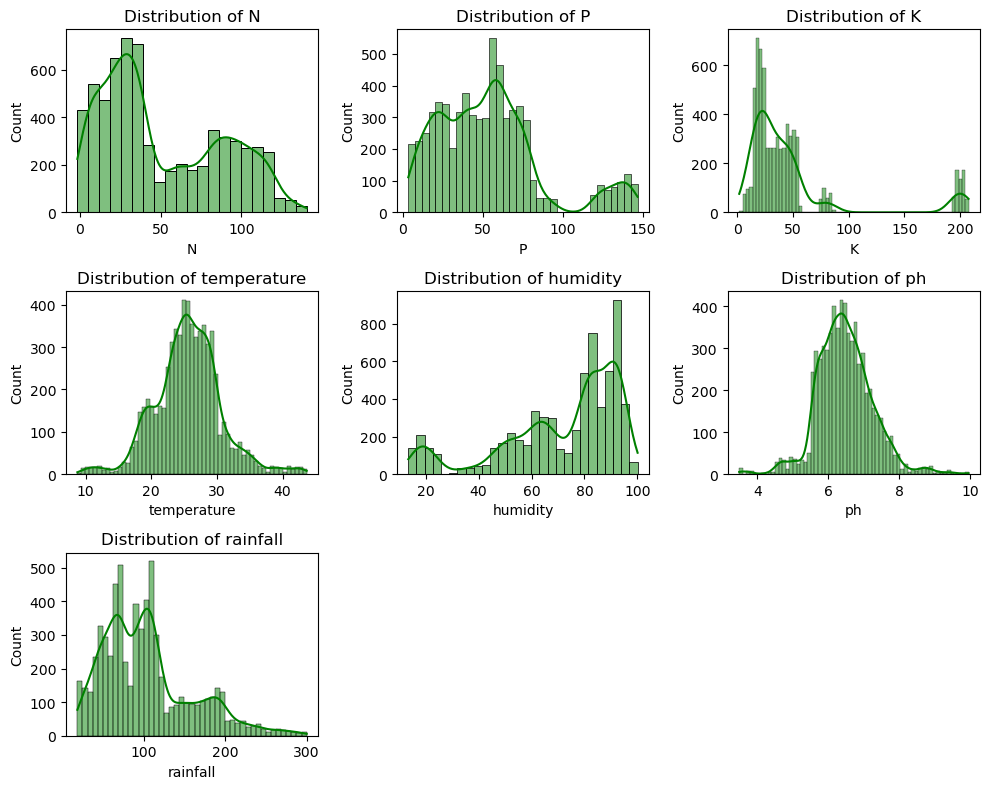

In [32]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(10, 8))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='green')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


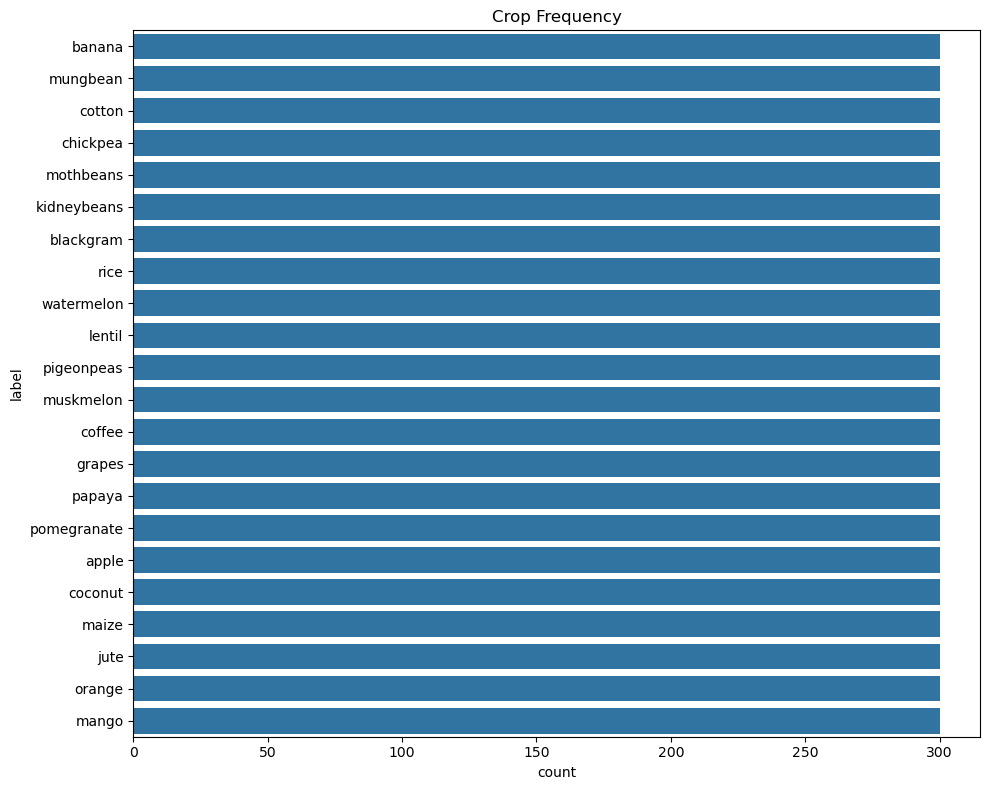

In [33]:
plt.figure(figsize=(10, 8))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title('Crop Frequency')
plt.tight_layout()
plt.show()


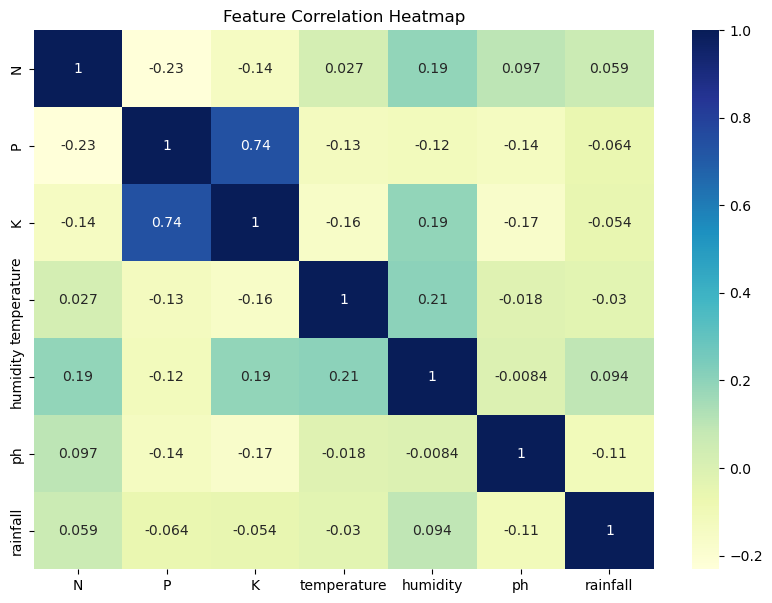

In [34]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[features].corr(), annot=True, cmap='YlGnBu')
plt.title('Feature Correlation Heatmap')
plt.show()


## 2222

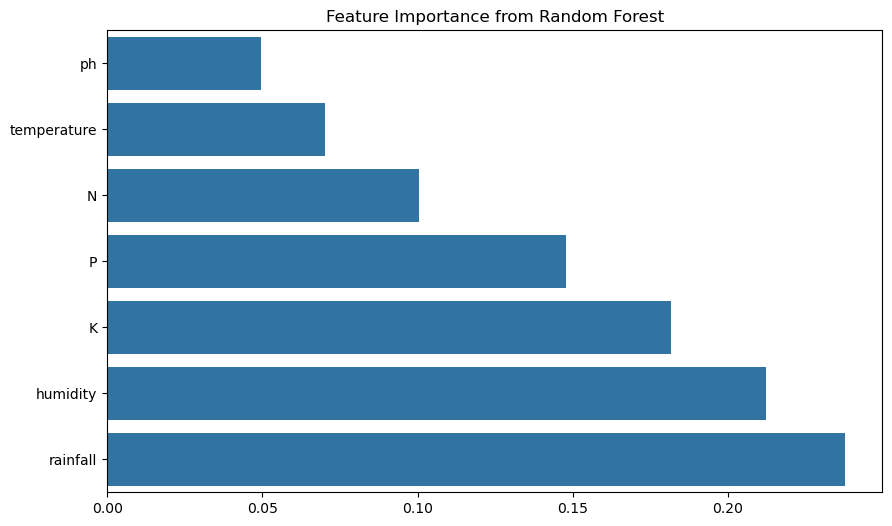

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = df[features]
le = LabelEncoder()
y = le.fit_transform(df['label'])

rf = RandomForestClassifier()
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(features)[indices])
plt.title('Feature Importance from Random Forest')
plt.show()


In [36]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[features]

le = LabelEncoder()
y = le.fit_transform(df['label'])
